<a href="https://colab.research.google.com/github/kshitijmamgain/test/blob/master/Orpita_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')
macro = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/USDA_Macronutrients.csv")
micro = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/USDA_Micronutrients.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
macro.head(3)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate
0,2047,"SALT,TABLE",0,0.0,0.0,0.00
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04


In [0]:
micro.head(3)

,ID,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,4038,0,0.0,0.00,0.0,0.00,0,0.0,149.40,0.0
1,8504,813,NaN,17.17,45.0,67.67,630,239.7,80.46,NaN
2,25021,386,0.0,16.90,886.0,14.20,412,68.0,64.25,3.1


In [0]:
full_data = pd.merge(macro,micro, how = 'outer', on = 'ID')

In [0]:
micro.shape, macro.shape, full_data.shape

((7057, 10), (7057, 6), (7057, 15))

In [0]:
full_data.head(3)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,"38,758",0.0,0.00,24.0,0.33,8,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5,0.0,0.40,7.0,0.20,73,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2,0.0,0.04,6.0,0.03,2,0.0,0.0,0.0


In [0]:
full_data.isnull().sum()

ID                 0
Description        0
Calories           0
Protein            0
TotalFat           0
Carbohydrate       0
Sodium            83
Cholesterol      287
Sugar           1909
Calcium          135
Iron             122
Potassium        408
VitaminC         331
VitaminE        2719
VitaminD        2833
dtype: int64

In [0]:

full_data.dtypes

ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium           object
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium        object
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [0]:
full_data["Sodium"] = full_data["Sodium"].str.replace(",","").astype(float)
full_data["Potassium"] = full_data["Potassium"].str.replace(",","").astype(float)

In [0]:
full_data.dtypes

ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [0]:
def impute_variable(vec):
    vnew= vec.fillna(vec.mean())
    return vnew

In [0]:
impute_variable(full_data["Sodium"])

0       38758.00000
1           5.00000
2           2.00000
3        8068.00000
4         719.00000
           ...     
7052        0.00000
7053      322.05922
7054      322.05922
7055        0.00000
7056        0.00000
Name: Sodium, Length: 7057, dtype: float64

In [0]:
def impute_variable(vec, val = 0):
    if val == 'mean':
      vnew= vec.fillna(vec.mean())
    elif val == 'median':
      vnew = vec.fillna(vec.median())
    else:
      vnew = vec.fillna(0)
    return vnew

In [0]:
impute_variable(full_data["Sodium"])

0       38758.0
1           5.0
2           2.0
3        8068.0
4         719.0
         ...   
7052        0.0
7053        0.0
7054        0.0
7055        0.0
7056        0.0
Name: Sodium, Length: 7057, dtype: float64

In [0]:
for col in full_data.columns:
  if full_data[col].dtypes == 'float':
      full_data[col] = impute_variable(full_data[col],'median')
  else:
    pass


In [0]:
full_data.isnull().sum()

ID              0
Description     0
Calories        0
Protein         0
TotalFat        0
Carbohydrate    0
Sodium          0
Cholesterol     0
Sugar           0
Calcium         0
Iron            0
Potassium       0
VitaminC        0
VitaminE        0
VitaminD        0
dtype: int64

In [0]:
full_data["food_type"] = full_data.Description.apply(lambda x: x.split(',')[0])

In [0]:
full_data.food_type

0                        SALT
1                     VINEGAR
2                     VINEGAR
3            CAMPBELL SOUP CO
4       CAMPBELL SOUP COMPANY
                ...          
7052                      OIL
7053                      OIL
7054                      OIL
7055                      OIL
7056                      OIL
Name: food_type, Length: 7057, dtype: object

In [0]:
full_data.food_type.nunique()

1312

In [0]:
full_data.food_type = full_data.food_type.apply(lambda x: x.split(' ')[0])

In [0]:
freq_list = list(pd.DataFrame(full_data.food_type.value_counts().head(10)).index)

In [0]:
full_data.food_type.nunique()

793

In [0]:
frequent_types = full_data[full_data.food_type.isin(freq_list)]

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


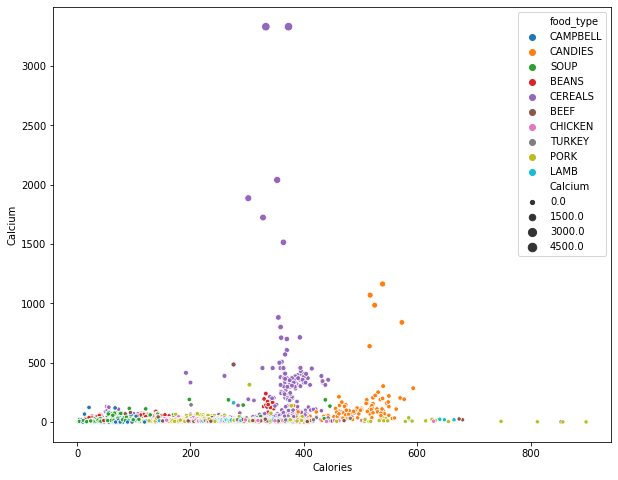

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "Calories", y = "Calcium", data = frequent_types, hue = "food_type", size = "Calcium")

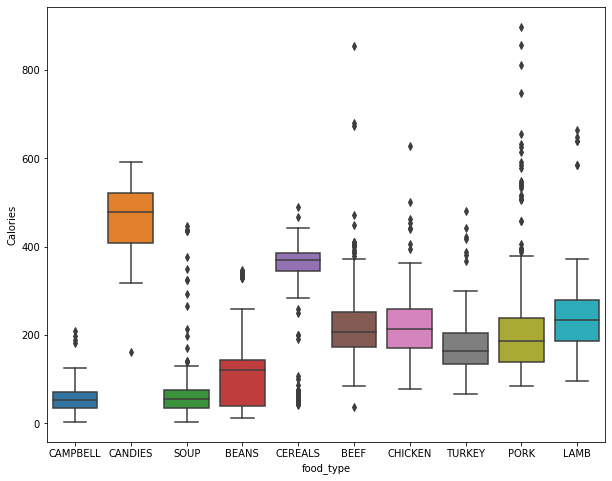

In [0]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "food_type", y = "Calories", data = frequent_types )

In [0]:
frequent_types["lamb_beef"] = frequent_types["food_type"].map({"BEEF":1,"LAMB":1}).copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
frequent_types["lamb_beef"].fillna(0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
frequent_types["lamb_beef"].value_counts()

0.0    1685
1.0     932
Name: lamb_beef, dtype: int64

In [0]:
import pandas_profiling


In [0]:
pandas_profiling.ProfileReport(frequent_types)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,2617
Total Missing (%),0.0%
Total size in memory,368.1 KiB
Average record size in memory,144.0 B
Numeric,15
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
X = frequent_types.drop(columns = ['Description','ID','food_type','lamb_beef'], axis =0)
X

,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
3,188,0.00,0.00,56.29,8068.0,0.0,18.760,19.0,6.75,250.0,45.0,0.27,0.0
4,25,0.00,0.00,6.25,719.0,0.0,6.250,0.0,0.00,250.0,0.0,0.27,0.0
5,25,0.00,0.00,6.25,844.0,0.0,6.250,0.0,0.00,250.0,0.0,0.27,0.0
6,25,0.00,0.00,6.25,625.0,0.0,6.250,19.0,1.33,250.0,0.0,0.27,0.0
7,38,0.00,0.00,9.38,656.0,0.0,6.250,0.0,0.00,250.0,5.6,0.27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,748,5.05,80.50,0.00,1424.0,86.0,0.000,6.0,0.44,66.0,0.0,0.00,0.2
6940,812,2.92,88.69,0.00,11.0,57.0,0.000,2.0,0.18,65.0,0.1,0.00,3.1
6942,854,1.50,94.00,0.00,7.0,68.0,0.000,2.0,0.17,16.0,0.0,1.50,0.0
6943,857,1.76,94.16,0.00,5.0,110.0,1.395,1.0,0.09,31.0,0.0,0.27,0.0


In [0]:
y = frequent_types['lamb_beef']

In [0]:
# Split the test and train
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Normalizing the X feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [133]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_LR = LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_LR)

array([[948, 170],
       [ 40, 586]])

In [134]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score : ",accuracy_score(y_test, y_LR),"\n\n")


print(classification_report(y_test,y_LR))

Accuracy Score :  0.8795871559633027 


              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      1118
         1.0       0.78      0.94      0.85       626

    accuracy                           0.88      1744
   macro avg       0.87      0.89      0.87      1744
weighted avg       0.89      0.88      0.88      1744



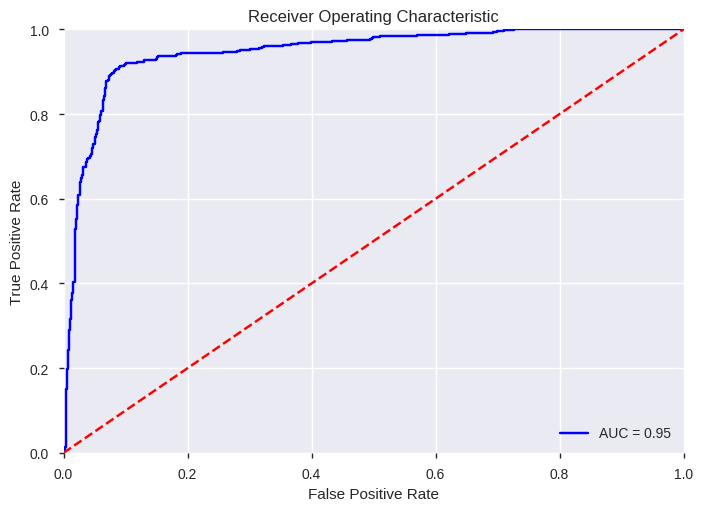

In [140]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()